In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(10)   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [5]:
import numpy as np

cols_clean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in cols_clean:
    df[i] = df[i].replace(0,np.NaN)
    cols_mean = int(df[i].mean(skipna=True))
    df[i] = df[i].replace(np.NaN, cols_mean)
data1 = df
data1.head().style.highlight_max(color="yellow").highlight_min(color="red")


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148.000000,72.000000,35.000000,155.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,155.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.000000,155.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1


In [10]:
def plot_distributions(df, columns_to_plot):
  for column in columns_to_plot:
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.show()

In [8]:
df_columns = df.columns
df_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

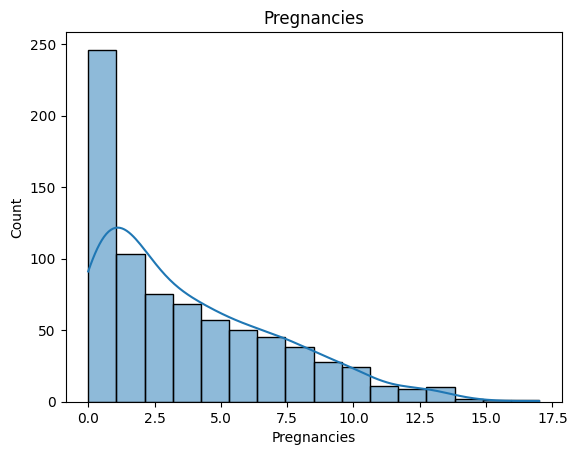

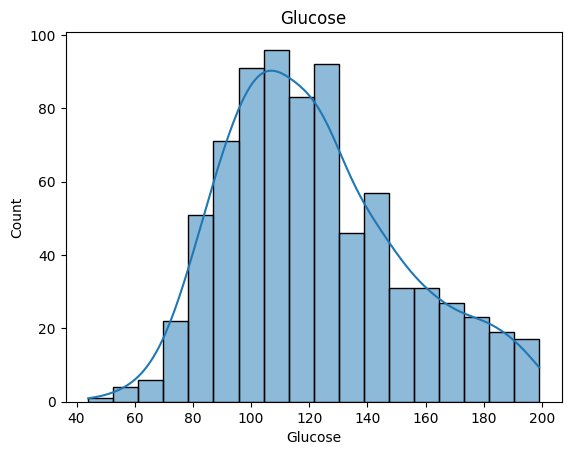

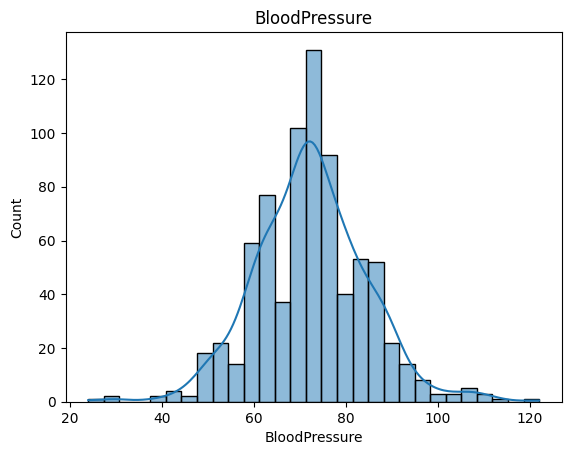

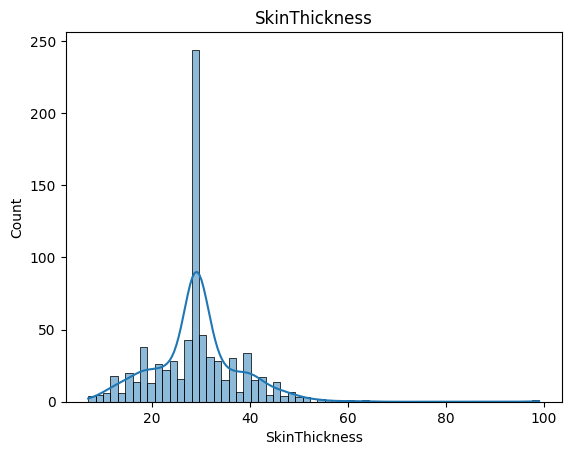

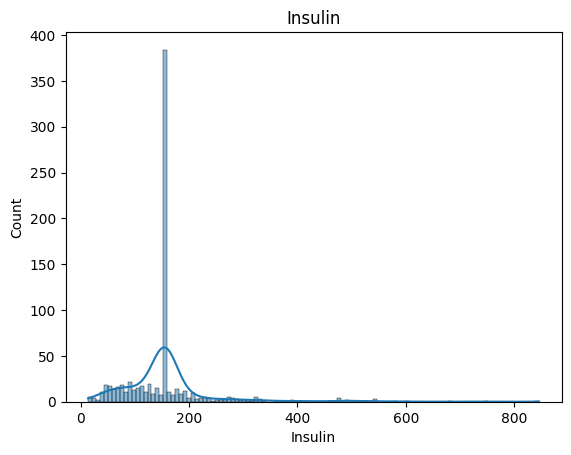

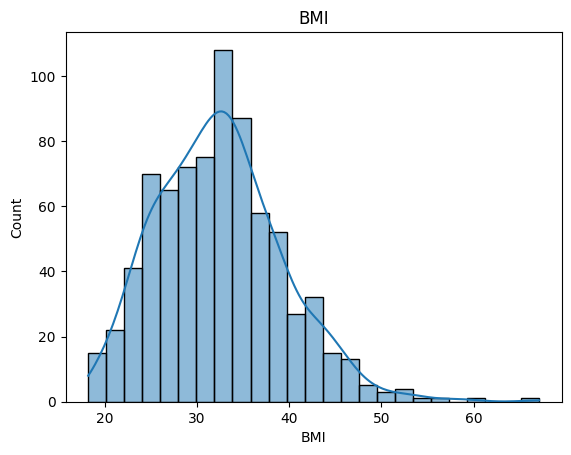

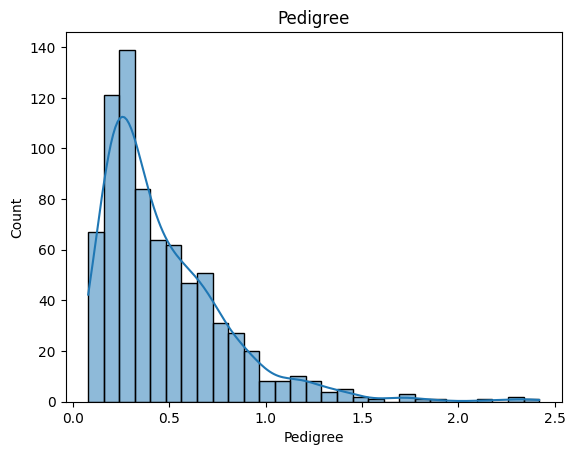

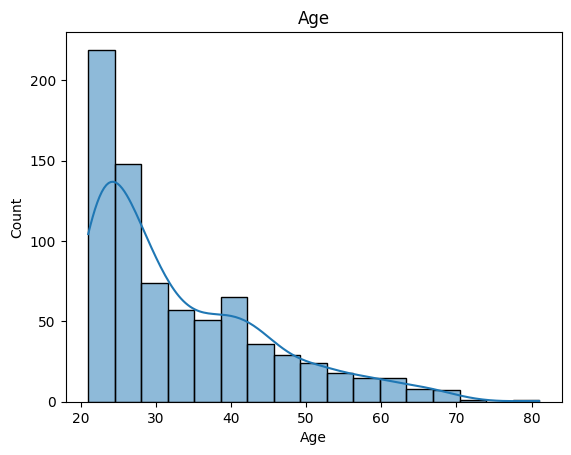

In [11]:
columns_to_plot_distribution = df_columns[:-1]
plot_distributions(df, columns_to_plot_distribution)

In [12]:
X = df.drop(columns='Outcome')  # Assuming 'Outcome' column is the target
y = df['Outcome']  # 1 for diabetic, 0 for non-diabetic

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)  # n_neighbors can be tuned

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)


In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate (1 - accuracy)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Confusion Matrix:
 [[67 32]
 [20 35]]
Accuracy: 0.6623376623376623
Error Rate: 0.33766233766233766
Precision: 0.5223880597014925
Recall: 0.6363636363636364
